<a href="https://colab.research.google.com/github/Minhajul99/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction Using Machine Learning

## Introduction
Diabetes is a growing chronic disease worldwide, with millions of people at risk of the potentially deadly complications of their growing heart disease as well as kidney failure and blindness when therapy is ignored. Early detection of medical conditions not only helps to reduce risks but also helps the patient in recovering from the illness sooner. In this project, we build a machine learning model that will take the medical data of people and tell how much risk of diabetes they have.


## Problem Statement
The existing methods for detecting diabetes depend mainly on clinical testing that shows high costs and requires time and presents access barriers for numerous people. The utilization of historical medical data for machine learning model training creates an effective system that predicts diabetes risk both accurately and cost-efficiently on a large scale.


## Objectives
**The primary objectives of this project are:**
* The development of a machine learning model should utilize key medical features including glucose level, BMI, and age to predict diabetes outcomes.
* Evaluate the performance of different ML algorithms and identify the most accurate model.


## Data Collection
The project will utilize the[ PIMA Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) from the UCI Machine Learning Repository, which contains 768 records of female patients along with their medical attributes.


## About the Dataset
* Pregnancies :- Number of times a woman has been pregnant
* Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose   
  tolerance test
* BloodPressure :- Diastollic Blood Pressure (mm hg)
* SkinThickness :- Triceps skin fold thickness(mm)
* Insulin :- 2 hour serum insulin(mu U/ml)
* BMI :- Body Mass Index ((weight in kg/height in m)^2)
* Age :- Age(years)
* DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)
* Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [ ]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# we want our plots to appear inside the notebook
%matplotlib inline


In [ ]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
# ANN
from sklearn.neural_network import MLPClassifier

In [ ]:
# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/diabetes.csv')
df.shape

(768, 9)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset we're working with.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Are there any missing values?
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There is no missing value.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Here we can see some unusal value in the minimum column. Blood Presure or Glucose never be Zero. So we can assume them as missing values. Here are the columns we assume as missing values:
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

We will try to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values.

In [ ]:
df_filtered = df.copy()
df_filtered[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_filtered[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
df_filtered.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


We will use Normal distribution and meassure the skewness to fill the NaN values.

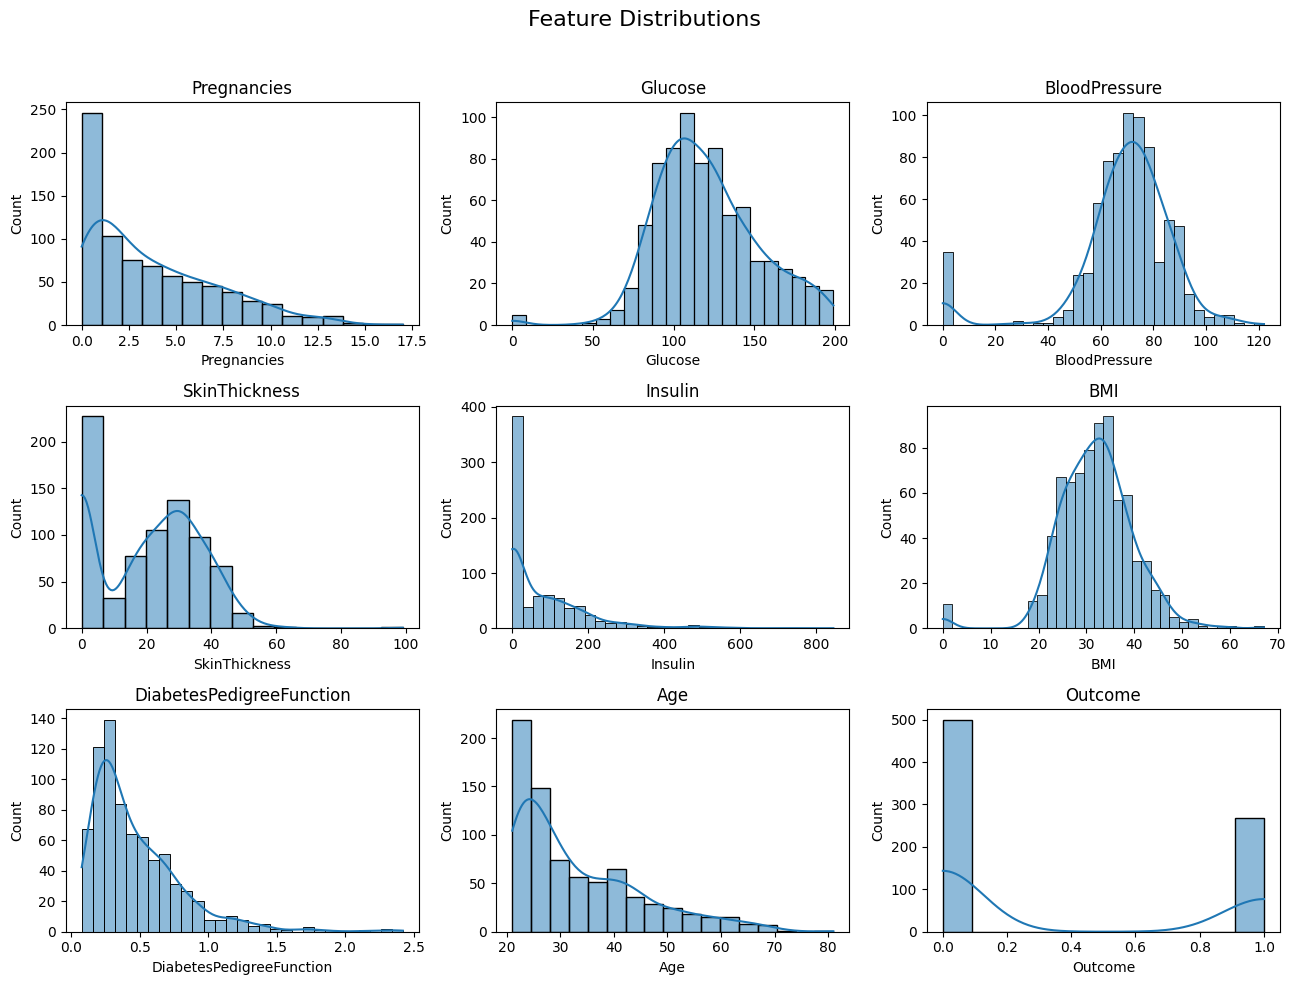

In [ ]:
# Plot histograms with KDE to visualize distribution
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
fig.suptitle("Feature Distributions", fontsize=16)

columns = df.columns
for i, ax in enumerate(ax.flat):
    if i < len(columns):
        sns.histplot(df[columns[i]], kde=True, ax=ax)
        ax.set_title(f"{columns[i]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

The Imputation of NaN values is made according to their distribution.

In [ ]:
df_filtered.fillna({'Glucose': df_filtered['Glucose'].mean()}, inplace=True)
df_filtered.fillna({'BloodPressure': df_filtered['BloodPressure'].mean()}, inplace=True)
df_filtered.fillna({'SkinThickness': df_filtered['SkinThickness'].median()}, inplace=True)
df_filtered.fillna({'Insulin': df_filtered['Insulin'].median()}, inplace=True)
df_filtered.fillna({'BMI': df_filtered['BMI'].mean()}, inplace=True)

### Distrition Plot after NaN removal

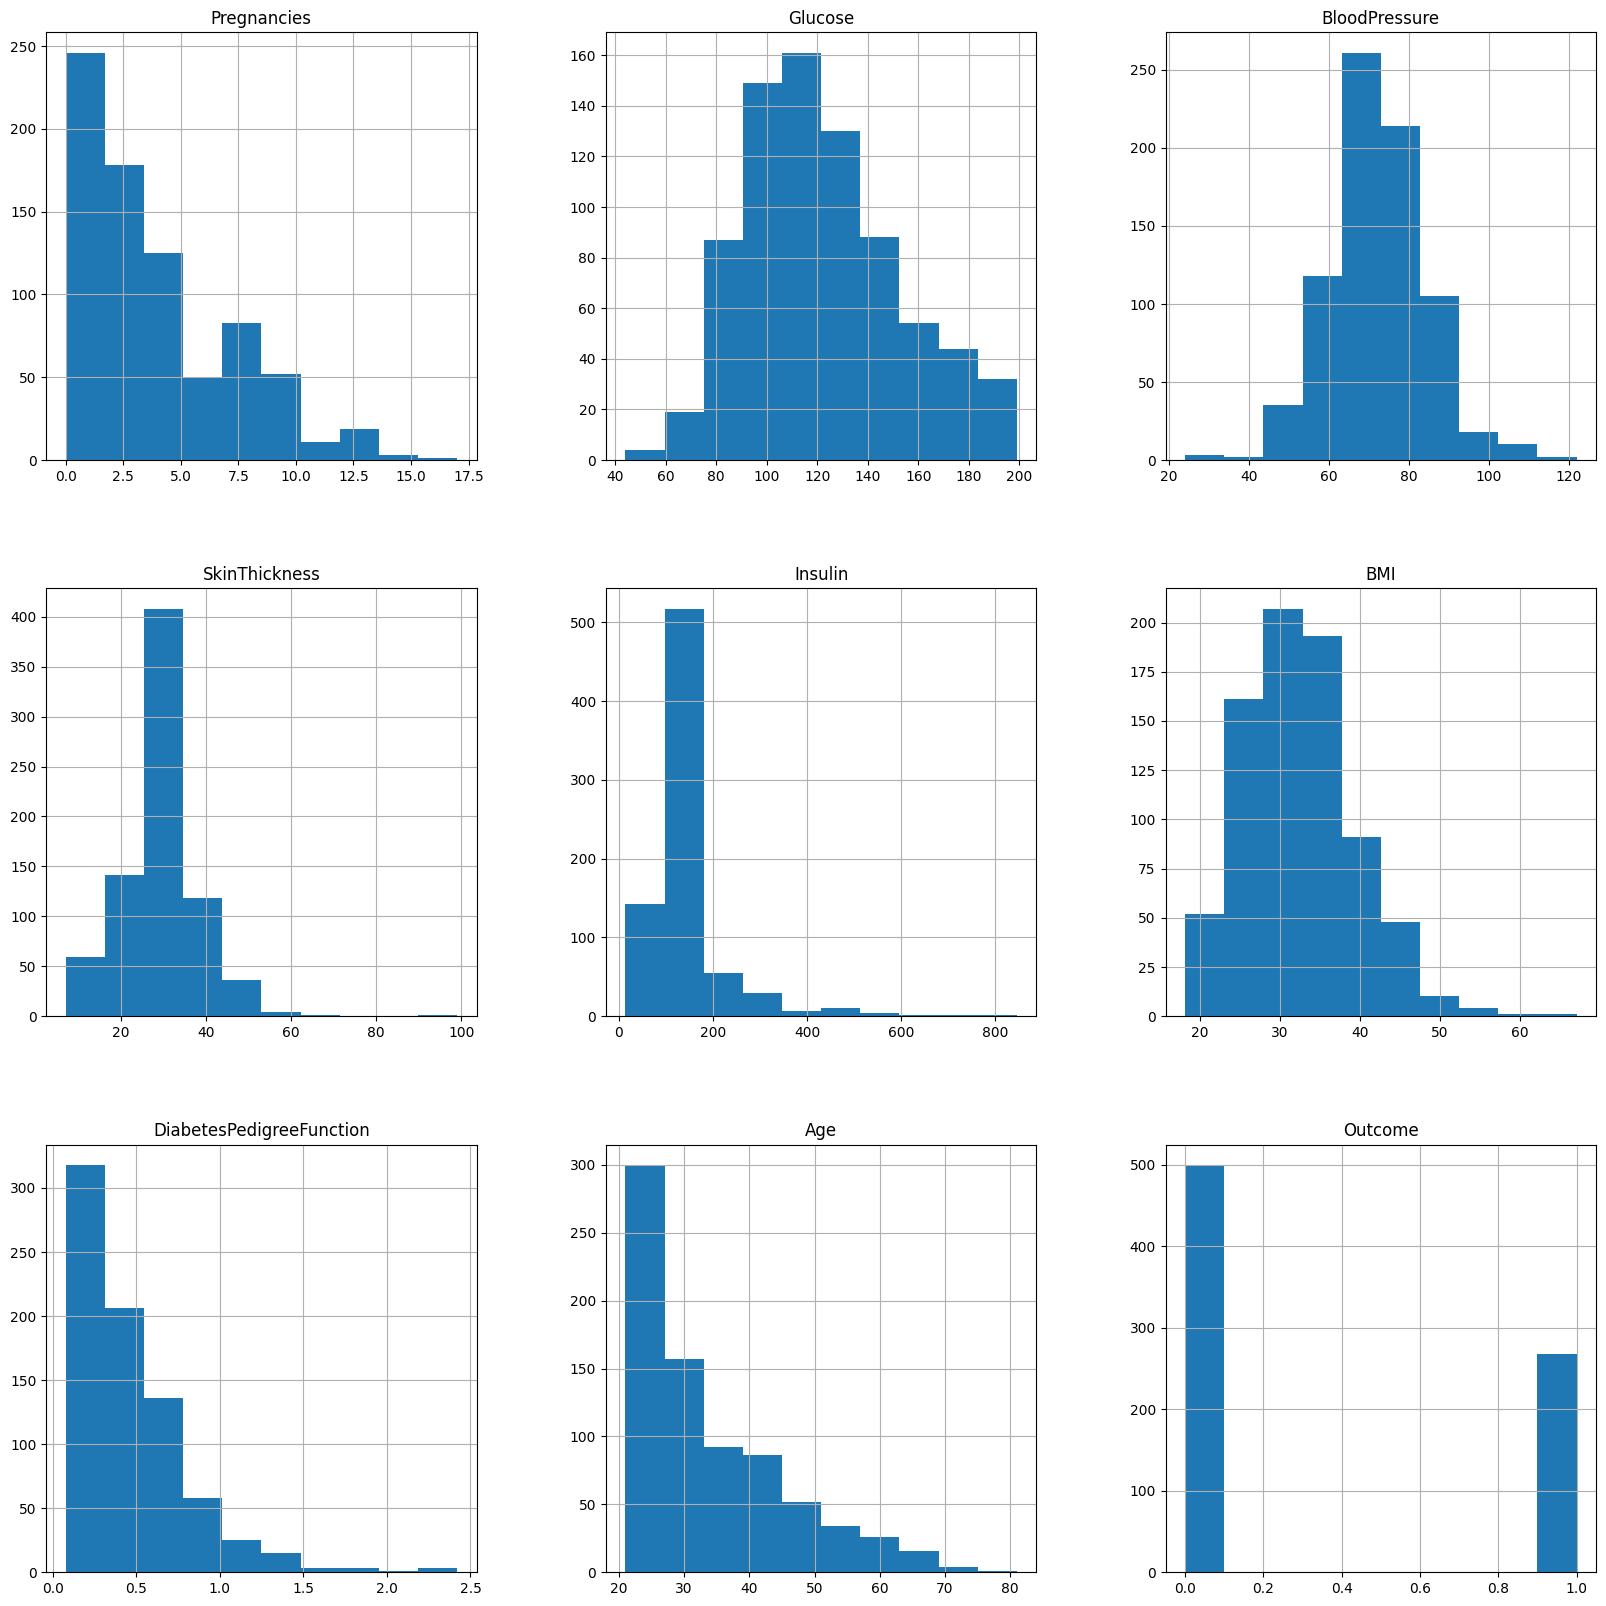

In [ ]:
df_filtered.hist(figsize = (20,20));

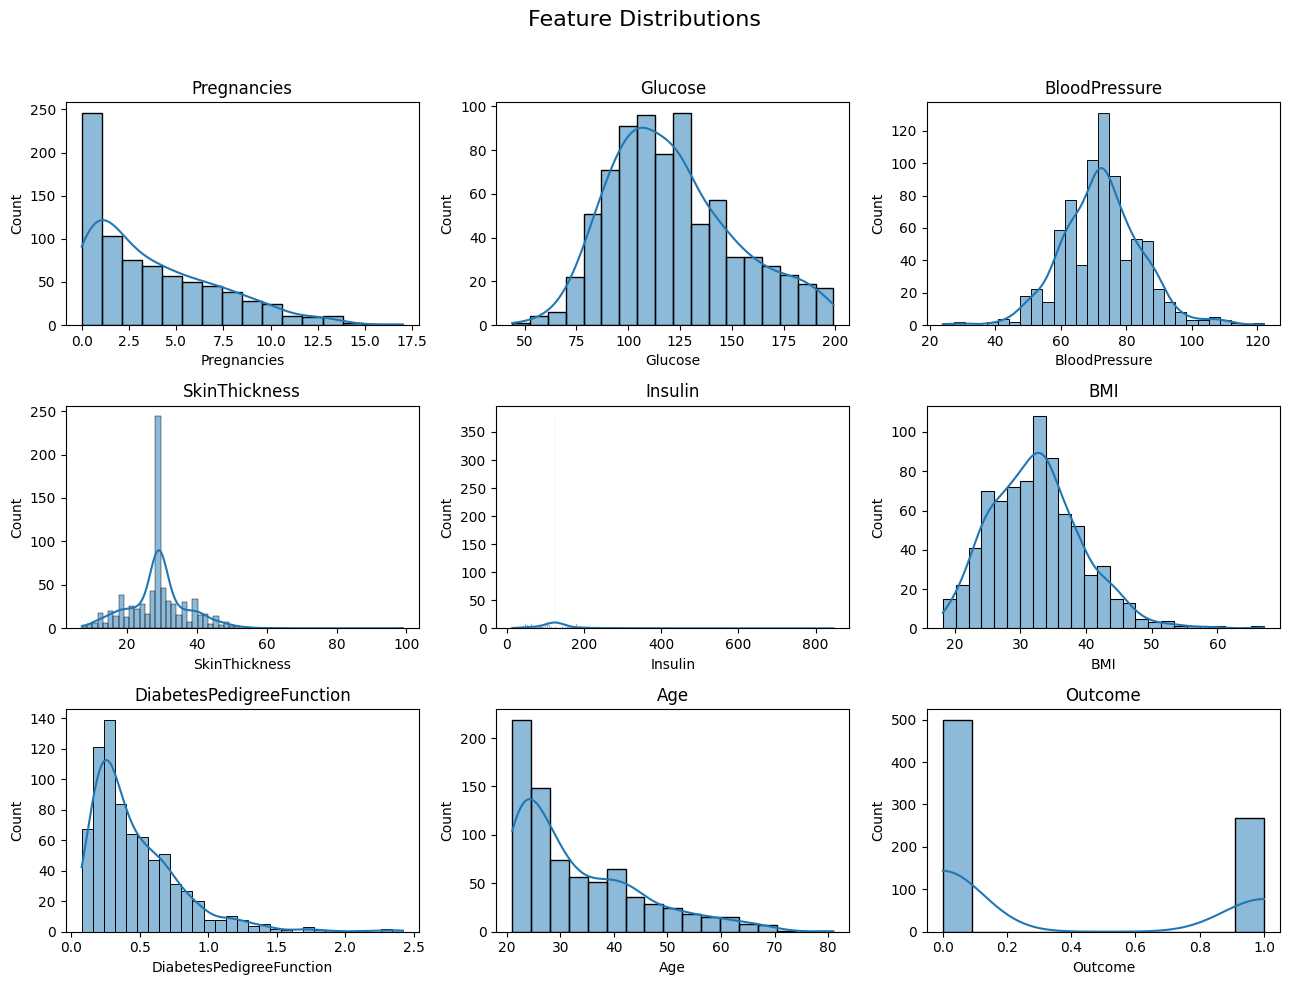

In [ ]:
# Plot histograms with KDE to visualize distribution
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))
fig.suptitle("Feature Distributions", fontsize=16)

columns = df_filtered.columns
for i, ax in enumerate(ax.flat):
    if i < len(columns):
        sns.histplot(df_filtered[columns[i]], kde=True, ax=ax)
        ax.set_title(f"{columns[i]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# Get value counts and convert it into a DataFrame
value_counts = df_filtered["Outcome"].value_counts().reset_index()
value_counts.columns = ["Outcome", "Count"]  # Rename columns for clarity

# Create the bar chart
fig = px.bar(
    value_counts,
    x="Outcome",
    y="Count",
    title="Outcome Distribution",
    text="Count",  # Correctly place text on bars
    color=value_counts["Outcome"].astype(str),  # Convert to string for color categories
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Update the layout (size & labels)
fig.update_layout(
    width=700,
    height=600,
    xaxis_title="Outcome",
    yaxis_title="Count",
    template="plotly_dark"
)

# Show correct count values on bars
fig.update_traces(textposition='outside')

# Display the chart
fig.show()

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

### Boxplots to find out outliers

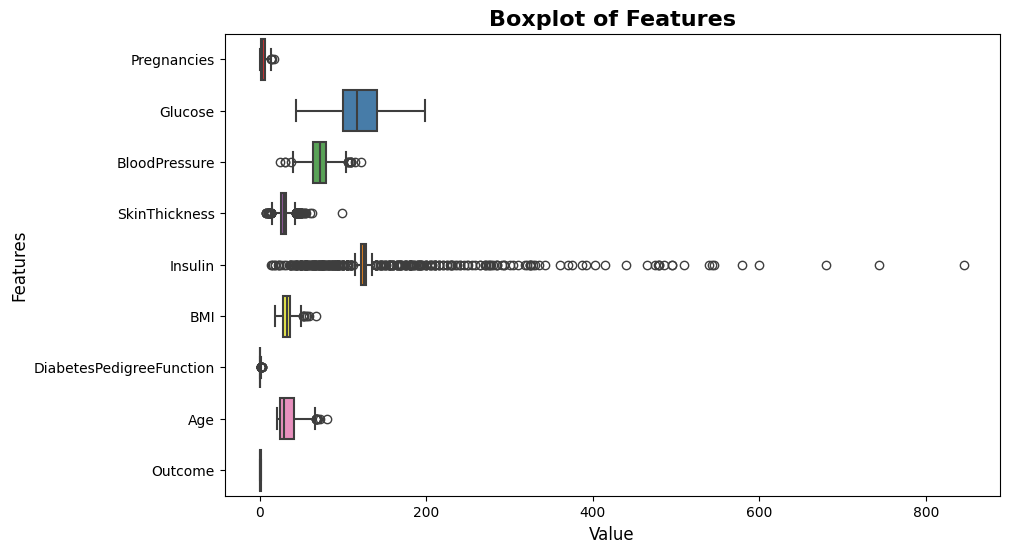

In [ ]:
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(
    data=df_filtered,
    orient="h",
    palette="Set1",
    showfliers=True,
    linewidth=1.5
)

# Add title with better styling
plt.title("Boxplot of Features", fontsize=16, fontweight='bold')

# Improve readability of axis labels
plt.xlabel("Value", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Display the plot
plt.show()


From this boxplot, the "Insulin" feature seems to have the most outliers.

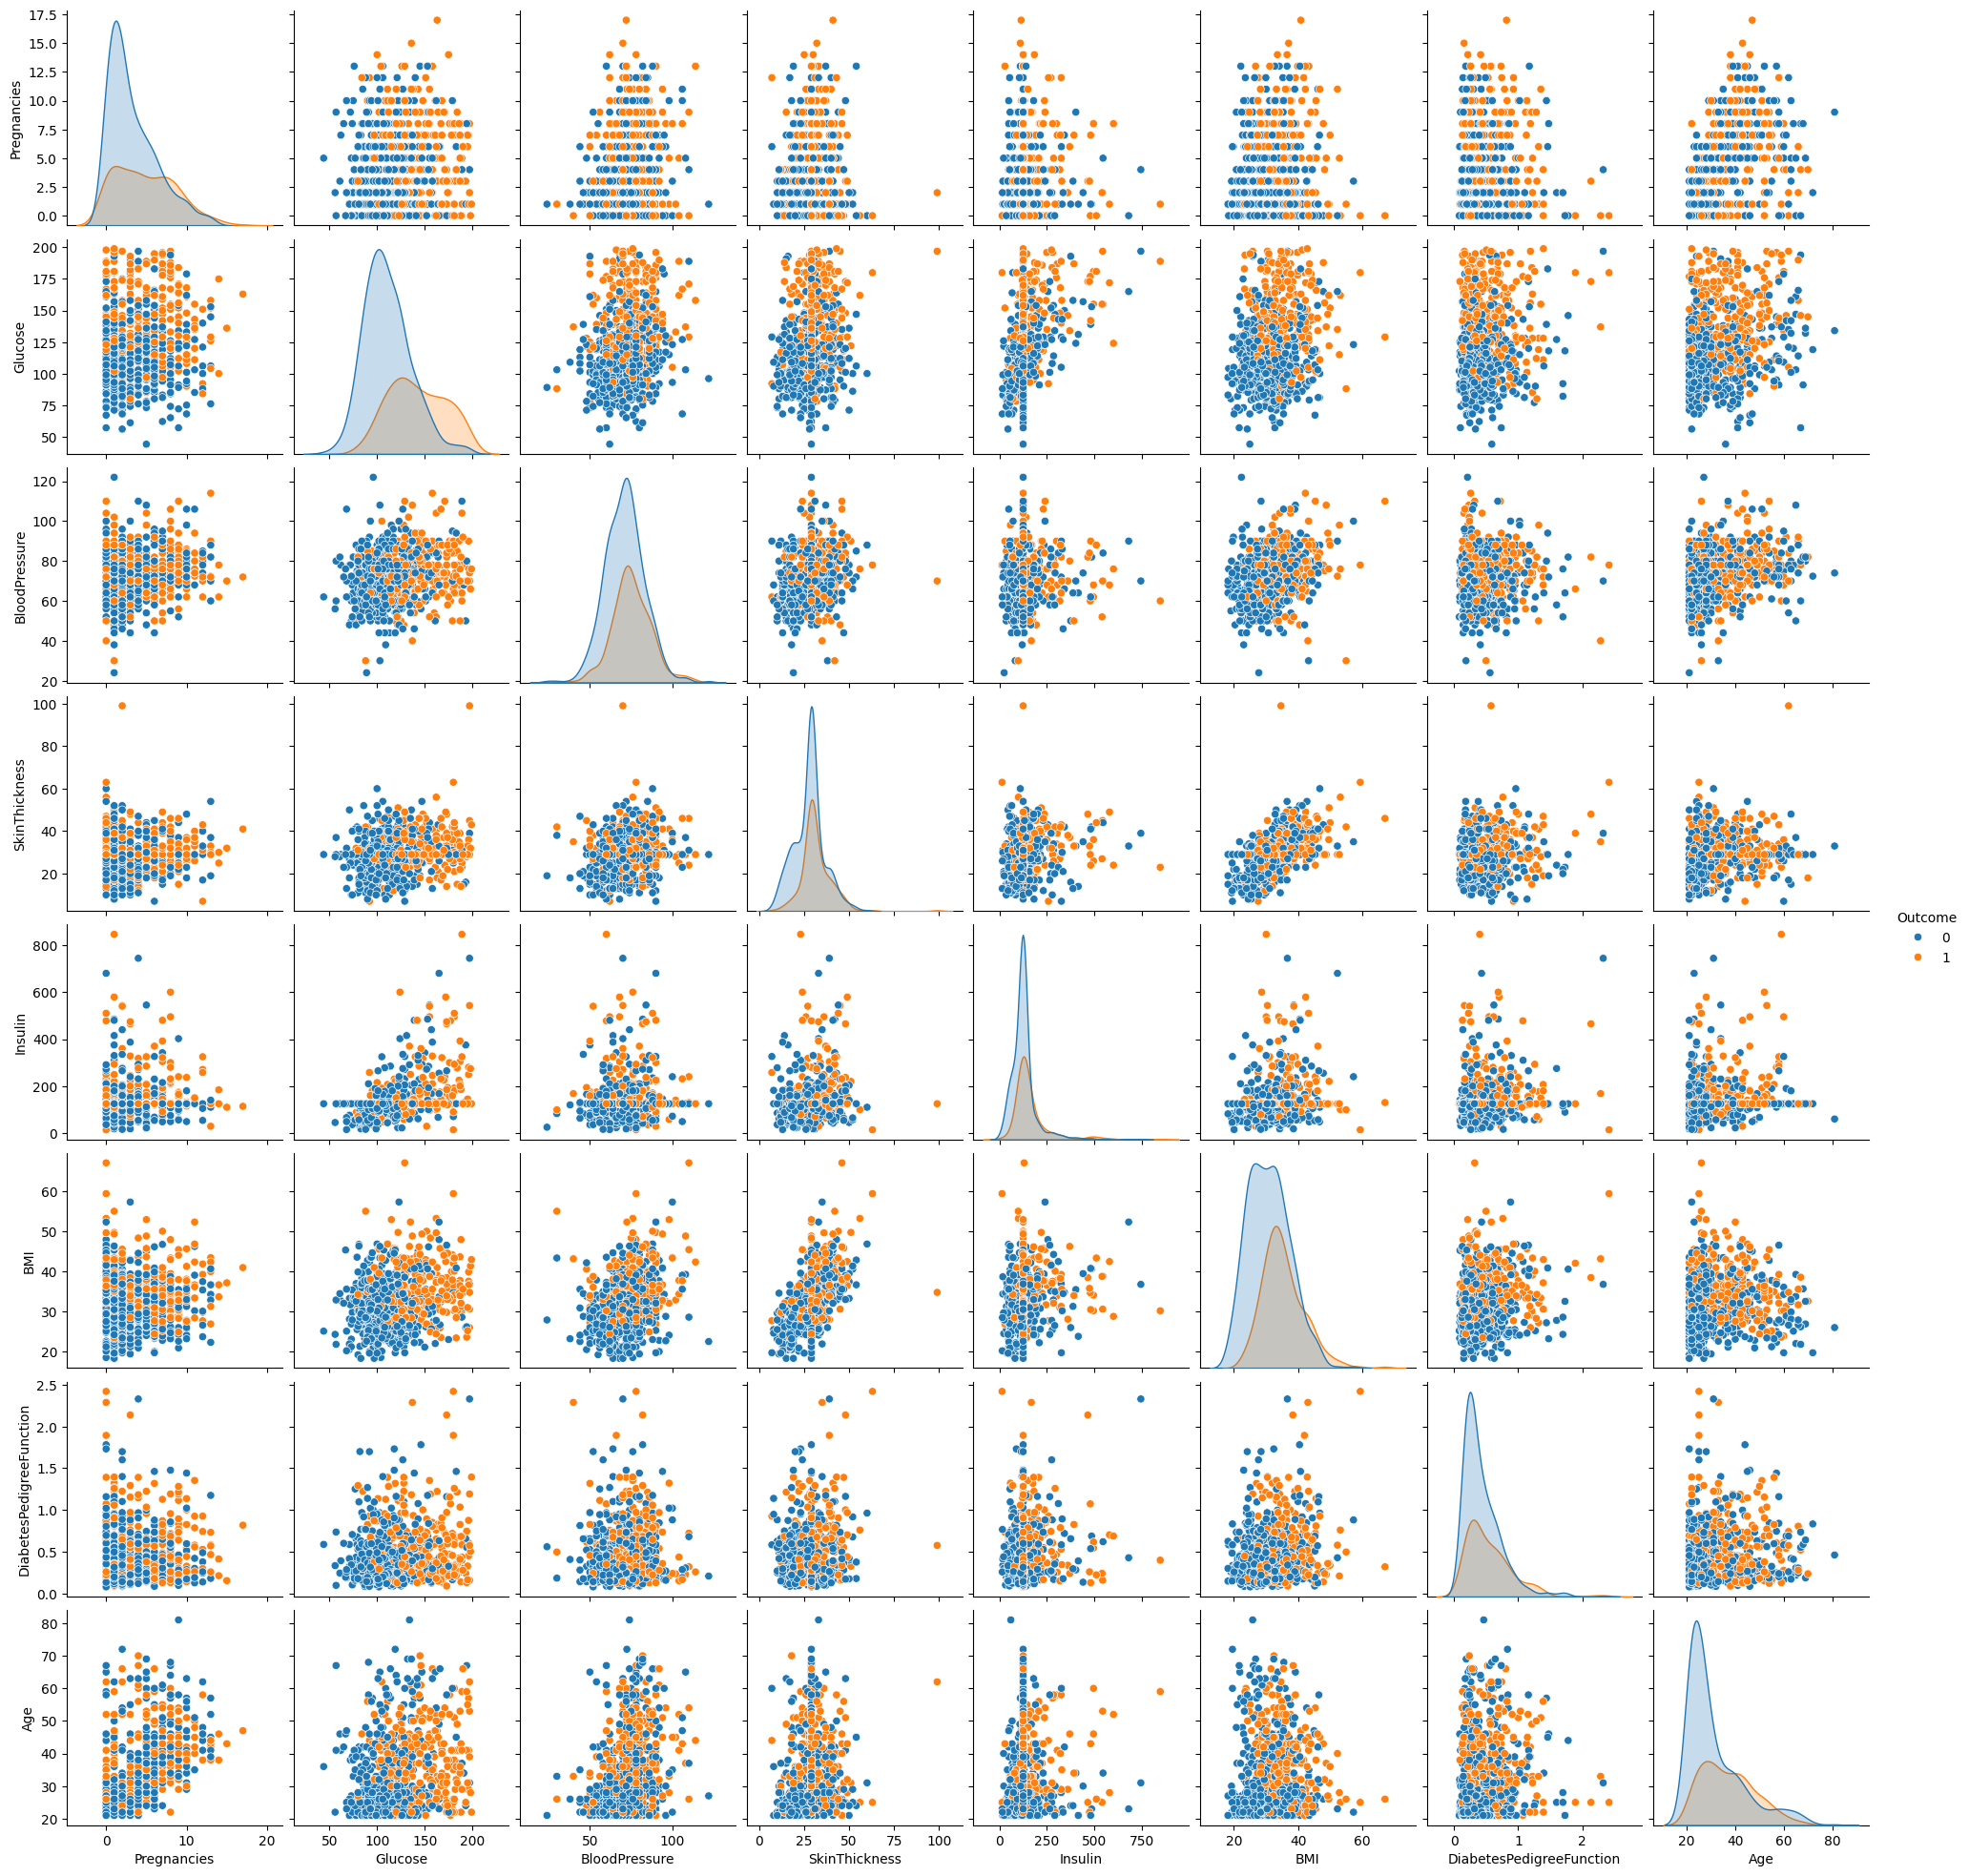

In [ ]:
# Pairplot of the cleaned data.
sns.pairplot(df_filtered, hue='Outcome', diag_kind='kde')
plt.show()


### Heatmap for unclean data

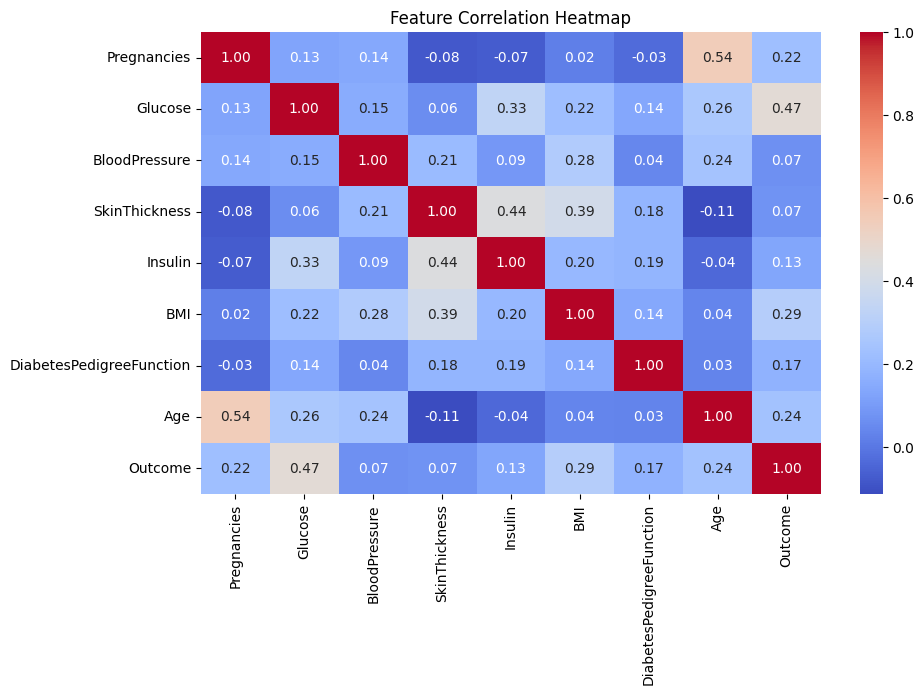

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Heatmap for clean data

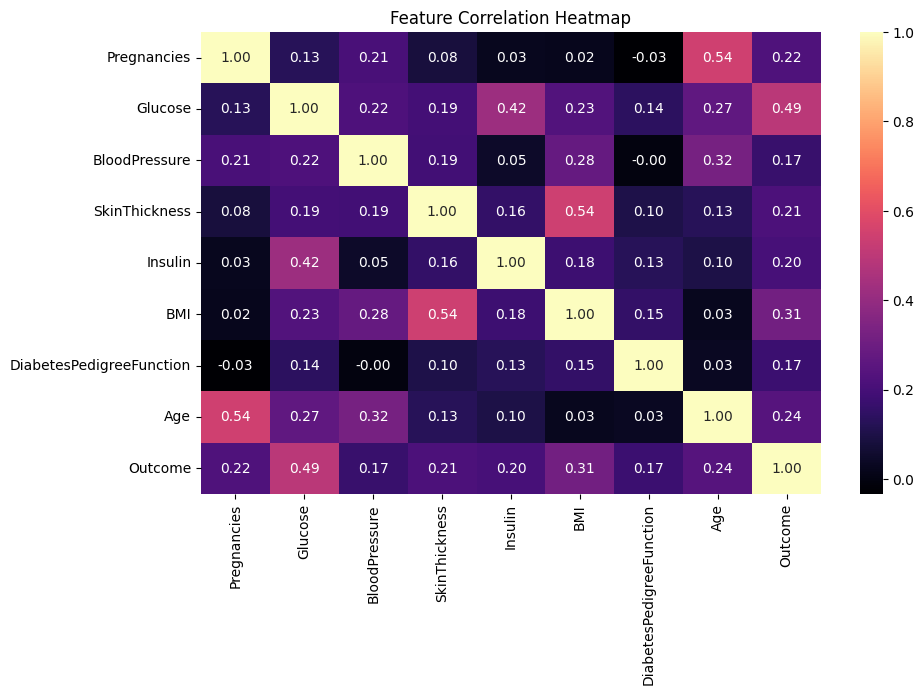

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
